# Raisin Class Prediction

Data Set Information:

Images of Kecimen and Besni raisin varieties grown in Turkey were obtained with CVS. A total of 900 raisin grains were used, including 450 pieces from both varieties. These images were subjected to various stages of pre-processing and 7 morphological features were extracted. These features have been classified using three different artificial intelligence techniques.


Attribute Information:

1. Area: Gives the number of pixels within the boundaries of the raisin.
2. Perimeter: It measures the environment by calculating the distance between the boundaries of the raisin and the pixels around it.
3. MajorAxisLength: Gives the length of the main axis, which is the longest line that can be drawn on the raisin.
4. MinorAxisLength: Gives the length of the small axis, which is the shortest line that can be drawn on the raisin.
5. Eccentricity: It gives a measure of the eccentricity of the ellipse, which has the same moments as raisins.
6. ConvexArea: Gives the number of pixels of the smallest convex shell of the region formed by the raisin.
7. Extent: Gives the ratio of the region formed by the raisin to the total pixels in the bounding box.
8. Class: Kecimen and Besni raisin.

# Import libraries

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

## Exploratory Data Analysis and Visualization

In [110]:
df = pd.read_excel('Raisin_Dataset.xlsx')
df1=df.copy()
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


## Train | Test Split and Scaling

In [111]:
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
le = LabelEncoder()
df.Class = le.fit_transform(df.Class)

In [112]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [113]:
pol_feature = PolynomialFeatures(degree=10)
X = pol_feature.fit_transform(X)

In [114]:
X = pd.DataFrame(X)

In [115]:
print(X)

     0        1           2           3         4         5         6      \
0      1.0  87524.0  442.246011  253.291155  0.819738   90546.0  0.758651   
1      1.0  75166.0  406.690687  243.032436  0.801805   78789.0  0.684130   
2      1.0  90856.0  442.267048  266.328318  0.798354   93717.0  0.637613   
3      1.0  45928.0  286.540559  208.760042  0.684989   47336.0  0.699599   
4      1.0  79408.0  352.190770  290.827533  0.564011   81463.0  0.792772   
..     ...      ...         ...         ...       ...       ...       ...   
895    1.0  83248.0  430.077308  247.838695  0.817263   85839.0  0.668793   
896    1.0  87350.0  440.735698  259.293149  0.808629   90899.0  0.636476   
897    1.0  99657.0  431.706981  298.837323  0.721684  106264.0  0.741099   
898    1.0  93523.0  476.344094  254.176054  0.845739   97653.0  0.658798   
899    1.0  85609.0  512.081774  215.271976  0.907345   89197.0  0.632020   

        7             8             9      ...       19438          19439  

In [116]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
895    0
896    0
897    0
898    0
899    0
Name: Class, Length: 900, dtype: int32


In [117]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# Logistic Regression

In [118]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [119]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [120]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

In [121]:
classifier.fit(X_train_scaled,y_train)

LogisticRegression()

In [122]:
y_pred = classifier.predict(X_test_scaled)

In [123]:
y_pred_proba = classifier.predict_proba(X_test_scaled)

In [124]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:,1]#1 olma olasılığı
test_data.head(10)

,0,1,2,3,4,5,6,7,8,9,...,19441,19442,19443,19444,19445,19446,19447,Class,pred,pred_proba
492,1.0,100443.0,457.569872,283.611280,0.784743,104186.0,0.673789,1269.066,1.008880e+10,4.595969e+07,...,2.427048e+11,4.571293e+14,8.609930e+17,1.621662e+21,3.054365e+24,5.752829e+27,1.083533e+31,0,0,0.142639
141,1.0,53698.0,348.223231,197.752897,0.823104,56089.0,0.731341,938.705,2.883475e+09,1.869889e+07,...,1.188056e+11,1.524916e+14,1.957290e+17,2.512257e+20,3.224580e+23,4.138874e+26,5.312407e+29,1,1,0.869117
409,1.0,104921.0,452.863013,297.024187,0.754864,108211.0,0.726298,1254.861,1.100842e+10,4.751484e+07,...,3.639748e+11,6.288574e+14,1.086508e+18,1.877214e+21,3.243356e+24,5.603707e+27,9.681803e+30,1,0,0.194653
31,1.0,41809.0,307.532739,175.085568,0.822114,43838.0,0.697444,828.697,1.747992e+09,1.285764e+07,...,5.428008e+10,6.449510e+13,7.663248e+16,9.105401e+19,1.081895e+23,1.285498e+26,1.527417e+29,1,1,0.919819
570,1.0,101223.0,496.533461,276.866203,0.830111,109593.0,0.713612,1345.426,1.024610e+10,5.026061e+07,...,4.327249e+11,8.158487e+14,1.538181e+18,2.900047e+21,5.467676e+24,1.030862e+28,1.943561e+31,0,0,0.009254
593,1.0,124166.0,525.945357,304.156469,0.815821,126960.0,0.728999,1388.684,1.541720e+10,6.530453e+07,...,5.581807e+11,1.063289e+15,2.025480e+18,3.858376e+21,7.349895e+24,1.400096e+28,2.667069e+31,0,0,0.013012
873,1.0,97494.0,451.782766,278.280008,0.787778,101878.0,0.689696,1254.755,9.505080e+09,4.404611e+07,...,2.667969e+11,4.853803e+14,8.830465e+17,1.606516e+21,2.922715e+24,5.317260e+27,9.673627e+30,0,0,0.154504
399,1.0,67852.0,353.124253,247.335231,0.713731,69587.0,0.729513,983.385,4.603894e+09,2.396019e+07,...,1.409589e+11,1.900128e+14,2.561377e+17,3.452742e+20,4.654303e+23,6.274010e+26,8.457379e+29,1,1,0.963695
406,1.0,66063.0,354.097525,238.510253,0.739121,67503.0,0.762676,971.938,4.364320e+09,2.339274e+07,...,1.756285e+11,2.238172e+14,2.852278e+17,3.634882e+20,4.632215e+23,5.903196e+26,7.522906e+29,1,1,0.973415
272,1.0,90178.0,466.249387,250.104302,0.843953,92321.0,0.752003,1180.478,8.132072e+09,4.204544e+07,...,3.511969e+11,5.513009e+14,8.654197e+17,1.358516e+21,2.132568e+24,3.347657e+27,5.255076e+30,1,0,0.385627


## Model Performance

In [125]:
from sklearn.metrics import confusion_matrix, classification_report

In [126]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [127]:
eval_metric(classifier, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[86 11]
 [ 6 77]]
              precision    recall  f1-score   support

           0       0.93      0.89      0.91        97
           1       0.88      0.93      0.90        83

    accuracy                           0.91       180
   macro avg       0.90      0.91      0.91       180
weighted avg       0.91      0.91      0.91       180


Train_Set
[[296  57]
 [ 36 331]]
              precision    recall  f1-score   support

           0       0.89      0.84      0.86       353
           1       0.85      0.90      0.88       367

    accuracy                           0.87       720
   macro avg       0.87      0.87      0.87       720
weighted avg       0.87      0.87      0.87       720



### Cross Validate

In [128]:
from sklearn.model_selection import cross_validate

In [129]:
model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_precision,test_recall,test_f1,test_accuracy
1,3.327950,0.019985,0.702128,0.891892,0.785714,0.750000
2,3.109088,0.012991,0.783784,0.783784,0.783784,0.777778
3,6.157512,0.011992,0.902439,1.000000,0.948718,0.944444
4,3.762591,0.013991,0.767442,0.891892,0.825000,0.805556
5,3.000653,0.058963,0.857143,0.972973,0.911392,0.902778
6,4.813678,0.012990,0.921053,0.945946,0.933333,0.930556
7,7.068923,0.086947,0.900000,0.729730,0.805970,0.819444
8,5.471519,0.013987,0.846154,0.916667,0.880000,0.875000
9,4.317730,0.015990,0.767442,0.916667,0.835443,0.819444
10,5.263757,0.018989,0.945946,0.972222,0.958904,0.958333


In [130]:
df_scores.mean()[2:]

test_precision    0.839353
test_recall       0.902177
test_f1           0.866826
test_accuracy     0.858333
dtype: float64

### GridSearchCV

In [131]:
from sklearn.linear_model import LogisticRegression
grid_model = LogisticRegression(C = 0.1, class_weight = None, penalty = 'l2', solver = 'liblinear')

In [132]:
grid_model.fit(X_train_scaled,y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [133]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[87 10]
 [ 5 78]]
              precision    recall  f1-score   support

           0       0.95      0.90      0.92        97
           1       0.89      0.94      0.91        83

    accuracy                           0.92       180
   macro avg       0.92      0.92      0.92       180
weighted avg       0.92      0.92      0.92       180


Train_Set
[[292  61]
 [ 37 330]]
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       353
           1       0.84      0.90      0.87       367

    accuracy                           0.86       720
   macro avg       0.87      0.86      0.86       720
weighted avg       0.87      0.86      0.86       720



## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

In [134]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

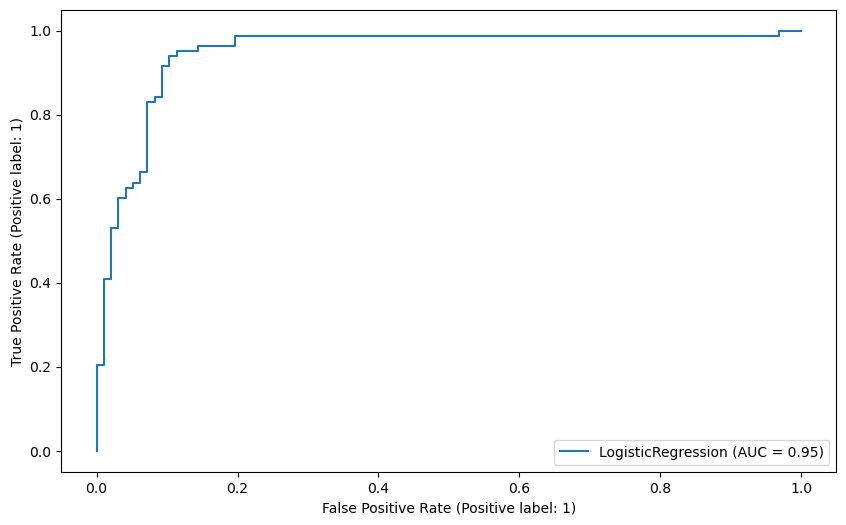

In [135]:
plot_roc_curve(grid_model, X_test_scaled, y_test);
plt.show()

In [136]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[87 10]
 [ 5 78]]
              precision    recall  f1-score   support

           0       0.95      0.90      0.92        97
           1       0.89      0.94      0.91        83

    accuracy                           0.92       180
   macro avg       0.92      0.92      0.92       180
weighted avg       0.92      0.92      0.92       180


Train_Set
[[292  61]
 [ 37 330]]
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       353
           1       0.84      0.90      0.87       367

    accuracy                           0.86       720
   macro avg       0.87      0.86      0.86       720
weighted avg       0.87      0.86      0.86       720



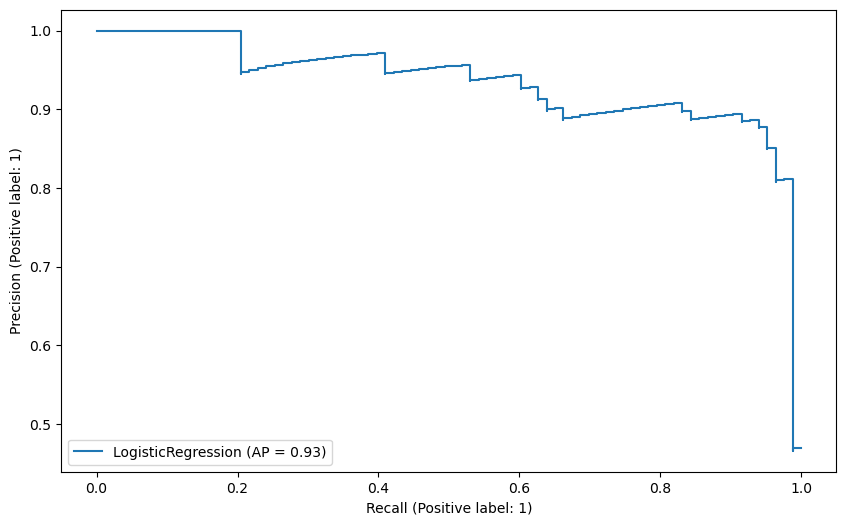

In [137]:
plot_precision_recall_curve(grid_model, X_test_scaled, y_test);
plt.show()

## Finding Best Model 

In [138]:
scaler = StandardScaler().fit(X)

In [139]:
import pickle
pickle.dump(scaler, open("scaler_diabates", 'wb'))

In [140]:
X_scaled = scaler.transform(X)

In [141]:
final_model = LogisticRegression(C=0.1, class_weight = None, penalty='l1', solver='liblinear').fit(X_scaled, y)

In [142]:
pickle.dump(final_model, open("final_model_diabates", 'wb'))

In [143]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
0,900.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
1,900.0,8.780413e+04,3.900211e+04,2.538700e+04,5.934800e+04,7.890200e+04,1.050282e+05,2.350470e+05
2,900.0,4.309300e+02,1.160351e+02,2.256295e+02,3.454429e+02,4.078040e+02,4.941870e+02,9.972919e+02
3,900.0,2.544881e+02,4.998890e+01,1.437109e+02,2.191111e+02,2.478484e+02,2.798886e+02,4.922753e+02
4,900.0,7.815422e-01,9.031841e-02,3.487296e-01,7.417663e-01,7.988460e-01,8.425710e-01,9.621244e-01
...,...,...,...,...,...,...,...,...
19443,900.0,1.276635e+18,2.291003e+18,1.190538e+16,1.903495e+17,4.515242e+17,1.159188e+18,2.554176e+19
19444,900.0,2.866261e+21,7.025541e+21,1.086835e+19,2.711575e+20,7.393049e+20,2.236134e+21,1.358137e+23
19445,900.0,7.135309e+24,2.879018e+25,9.921662e+21,3.680901e+23,1.186950e+24,4.150704e+24,7.221649e+26
19446,900.0,2.060806e+28,1.416800e+29,9.057431e+24,4.986534e+26,1.907190e+27,7.789865e+27,3.839981e+30


In [144]:
eval_metric(final_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[86 11]
 [ 9 74]]
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        97
           1       0.87      0.89      0.88        83

    accuracy                           0.89       180
   macro avg       0.89      0.89      0.89       180
weighted avg       0.89      0.89      0.89       180


Train_Set
[[296  57]
 [ 44 323]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.85       353
           1       0.85      0.88      0.86       367

    accuracy                           0.86       720
   macro avg       0.86      0.86      0.86       720
weighted avg       0.86      0.86      0.86       720



# Conclusion 

I run here polynomial feature for and inoavtive perspective it enhance the test set result but nothing change in training set